In [ ]:
# 

In [36]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


%config InlineBackend.figure_format = 'retina'

In [37]:
# Files

filepath = '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/'

# Violent merger Model1 with 5e5 particles

model1 = filepath + 'Model1_spec_105.dat'

# Violent merger Model2 with 5e6 particles

model2 = filepath + 'Model1_spec_106.dat'

In [38]:
columns = ['Time', 'Freq', 'L_nu', 'packet_count']

sedona_model1_df = pd.read_csv(model1, sep='\s+', engine='python',
                           comment='#', names=columns)

sedona_model2_df = pd.read_csv(model2, sep='\s+', engine='python',
                           comment='#', names=columns)

In [39]:
sedona_model1_df['Wavelength'] = sedona_model1_df['Freq'].apply(lambda x: 3e18/x) # in angstrom
sedona_model1_df['L_lambda'] = sedona_model1_df.apply(lambda x: (x['L_nu'] * x['Freq'])/ x['Wavelength'], axis=1)
sedona_model1_df = sedona_model1_df[(sedona_model1_df['Wavelength']>3000) & (sedona_model1_df['Wavelength'] < 9500)]

In [40]:
sedona_model2_df['Wavelength'] = sedona_model2_df['Freq'].apply(lambda x: 3e18/x) # in angstrom
sedona_model2_df['L_lambda'] = sedona_model2_df.apply(lambda x: (x['L_nu'] * x['Freq'])/ x['Wavelength'], axis=1)
sedona_model2_df = sedona_model2_df[(sedona_model2_df['Wavelength']>3000) & (sedona_model2_df['Wavelength'] < 9500)]

(3500.0, 9000.0)

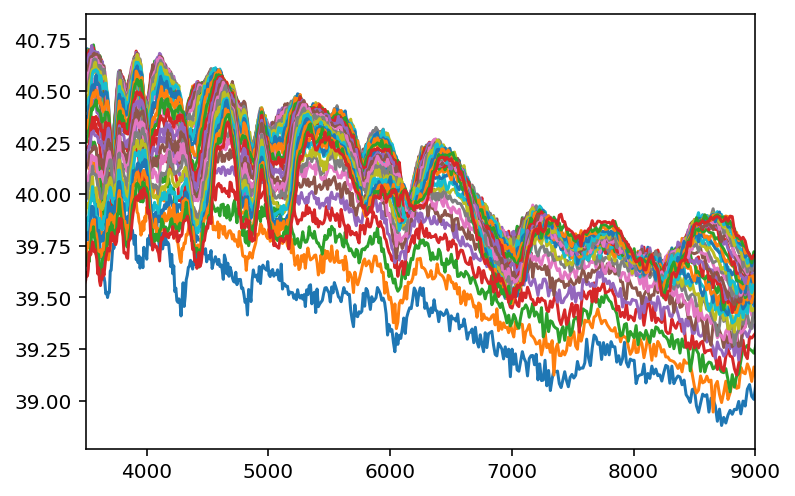

In [41]:
offset = [1.0, 2.0]
i = 0
for time, time_df in sedona_model1_df.groupby('Time'):
    day = time / 86400.
    if day < 10.5:
        day = str(0) + str(day)
    if 518400 < time < 3456000:
        plt.plot(time_df['Wavelength'], np.log10(time_df['L_lambda']) + offset[i])
        time_df.to_csv(filepath + 'Model1_' +  'Sedona_' + '105_' + str(day) + '.csv', sep=' ', index=None)
   # i = i + 1

plt.xlim(3500, 9000)  
#plt.ylim(0, 1.4e40)

(3500.0, 9000.0)

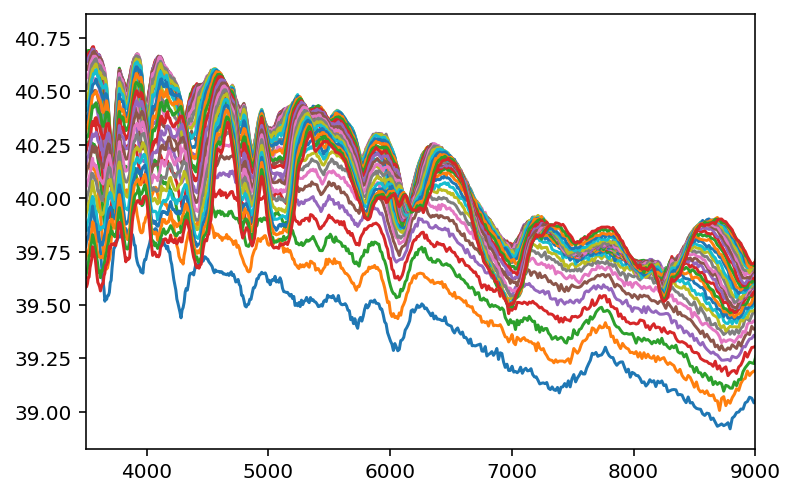

In [42]:
offset = [1.0, 2.0]
i = 0
for time, time_df in sedona_model2_df.groupby('Time'):
    day = time / 86400.
    if day < 10.5:
        day = str(0) + str(day)
    if 518400 < time < 3456000:
        plt.plot(time_df['Wavelength'], np.log10(time_df['L_lambda']) + offset[i])
        time_df.to_csv(filepath + 'Model2_' +  'Sedona_' + '106_' + str(day) + '.csv', sep=' ', index=None)
   # i = i + 1

plt.xlim(3500, 9000)  
#plt.ylim(0, 1.4e40)

In [64]:
def group_similar_files(text_list, common_text, exceptions=''):
    """
    Groups similar files based on the string 'common_text'. Writes the similar files
    onto the list 'text_list' (only if this string is not empty) and appends the similar
    files to a list 'python_list'.
    Args:
        text_list   : Name of the output text file with names grouped based on the 'common_text'
        common_text : String containing partial name of the files to be grouped
        exceptions  : String containing the partial name of the files that need to be excluded
    Returns:
        list_files  : Python list containing the names of the grouped files
    """
    list_files = glob.glob(common_text)
    if exceptions != '':
        list_exception = exceptions.split(',')
        for file_name in glob.glob(common_text):
            for text in list_exception:
                test = re.search(text, file_name)
                if test:
                    try:
                        list_files.remove(file_name)
                    except ValueError:
                        pass

    list_files.sort()
    if len(text_list) != 0:
        with open(text_list, 'w') as f:
            for file_name in list_files:
                f.write(file_name + '\n')

    return list_files

# ======================================================================================== #

def plot_sedona_spectrum(filename, ax, scale=1.0, color='red', alpha=0.7, label='__nolegend__'):
    
    df = pd.read_csv(filename, sep='\s+', engine='python')
    ax.plot(df['Wavelength'], df['L_lambda'] * scale, color=color, ls='-', alpha=alpha, lw=2.0,
           label=label)
    ax.legend(fontsize=25)
    
# ======================================================================================== #
    

In [44]:
list_model1_spectra = sorted(glob.glob(filepath + 'Model1_Sedona_105*'))

print (list_model1_spectra)

['/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model1_Sedona_105_06.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model1_Sedona_105_07.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model1_Sedona_105_08.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model1_Sedona_105_09.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model1_Sedona_105_10.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model1_Sedona_105_11.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model1_Sedona_105_12.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model1_Sedona_105_13.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model1_Sedona_105_14.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model1_Sedona_105_15.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model1_Sedona_105_16.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model1_Sedona_105_17

In [45]:
list_model2_spectra = sorted(glob.glob(filepath + 'Model2_Sedona_106*'))

print (list_model2_spectra)

['/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model2_Sedona_106_06.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model2_Sedona_106_07.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model2_Sedona_106_08.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model2_Sedona_106_09.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model2_Sedona_106_10.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model2_Sedona_106_11.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model2_Sedona_106_12.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model2_Sedona_106_13.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model2_Sedona_106_14.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model2_Sedona_106_15.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model2_Sedona_106_16.5.csv', '/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model2_Sedona_106_17

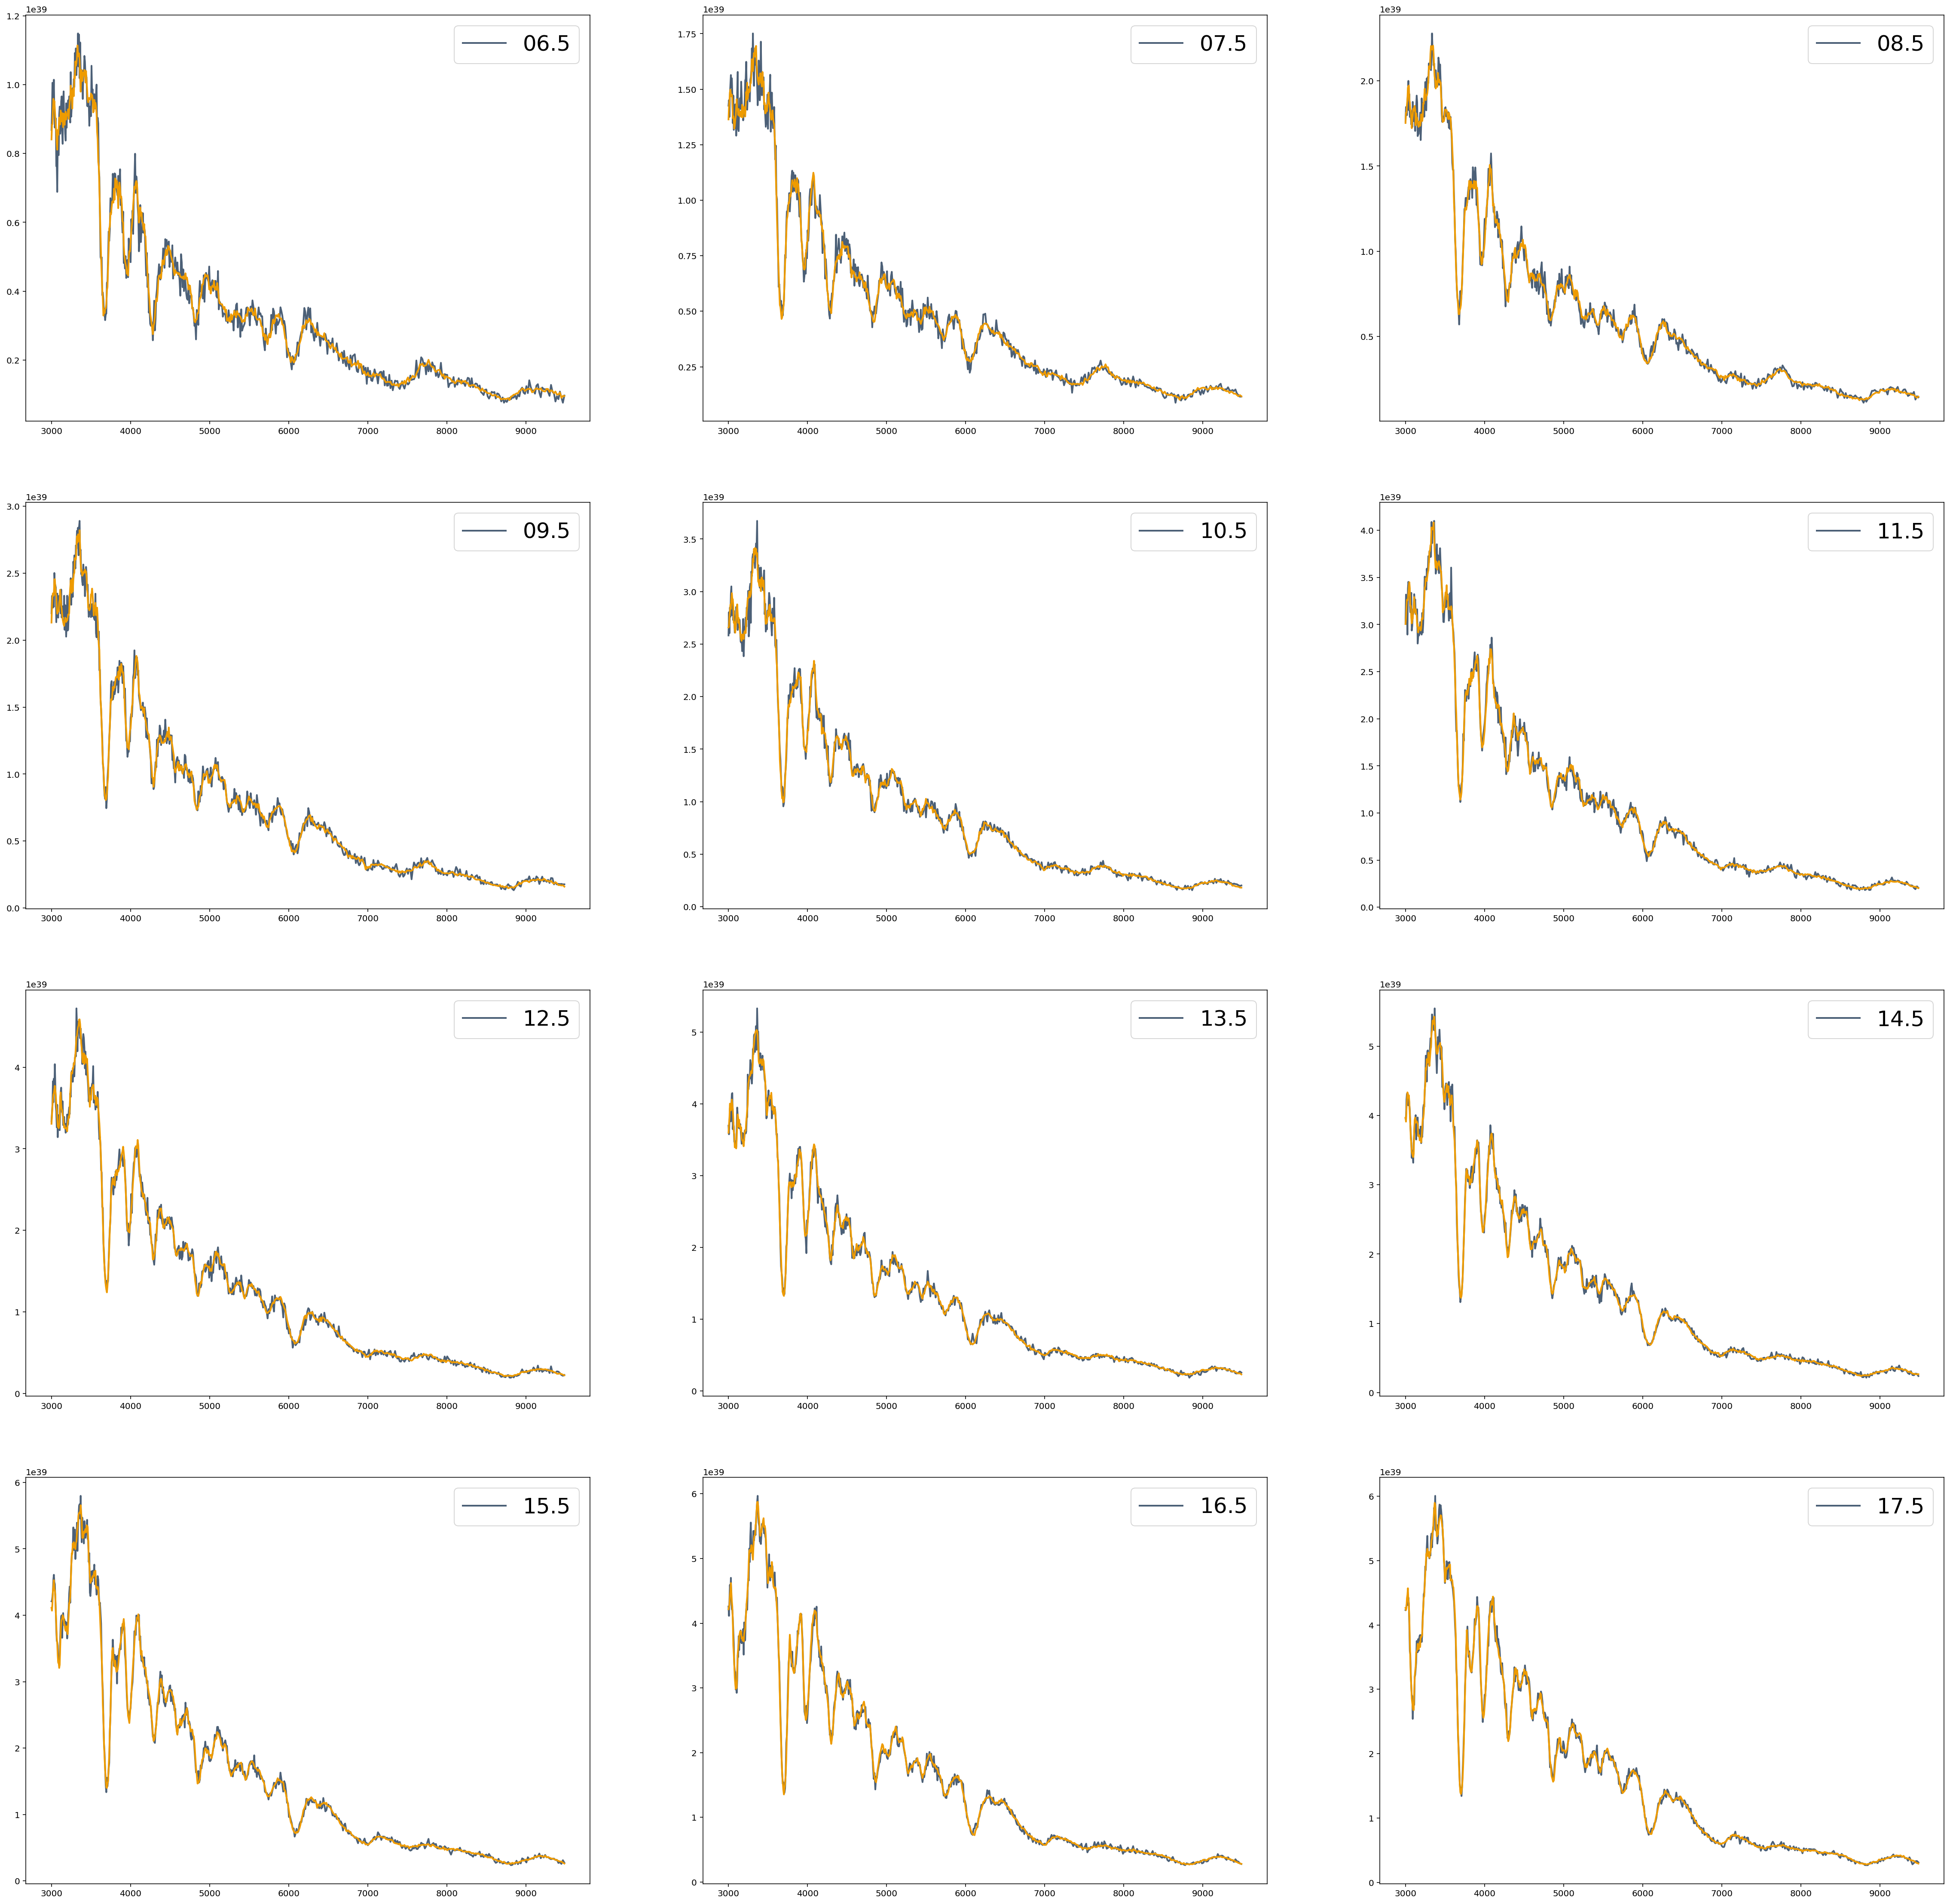

In [74]:
fig, axs = plt.subplots(4, 3, figsize=(40, 40))
#fig.delaxes(axs[3, 2])
#fig.delaxes(axs[3, 1])

#plot_spectrum(list_text_spectra[0], axs[0, 0], 1000, 200, 0.5e39, 0.1e39, phase='9.6')
plot_sedona_spectrum(list_model1_spectra[0], axs[0, 0], color='#001d3d', alpha=0.7, label=list_model1_spectra[0].split('/')[-1].split('_')[-1][0:4])
plot_sedona_spectrum(list_model2_spectra[0], axs[0, 0], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[1], axs[0, 1], color='#001d3d', alpha=0.7, label=list_model1_spectra[1].split('/')[-1].split('_')[-1][0:4])
plot_sedona_spectrum(list_model2_spectra[1], axs[0, 1], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[2], axs[0, 2], color='#001d3d', alpha=0.7, label=list_model1_spectra[2].split('/')[-1].split('_')[-1][0:4])
plot_sedona_spectrum(list_model2_spectra[2], axs[0, 2], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[3], axs[1, 0], color='#001d3d', alpha=0.7, label=list_model1_spectra[3].split('/')[-1].split('_')[-1][0:4])
plot_sedona_spectrum(list_model2_spectra[3], axs[1, 0], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[4], axs[1, 1], color='#001d3d', alpha=0.7, label=list_model1_spectra[4].split('/')[-1].split('_')[-1][0:4])
plot_sedona_spectrum(list_model2_spectra[4], axs[1, 1], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[5], axs[1, 2], color='#001d3d', alpha=0.7, label=list_model1_spectra[5].split('/')[-1].split('_')[-1][0:4])
plot_sedona_spectrum(list_model2_spectra[5], axs[1, 2], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[6], axs[2, 0], color='#001d3d', alpha=0.7, label=list_model1_spectra[6].split('/')[-1].split('_')[-1][0:4])
plot_sedona_spectrum(list_model2_spectra[6], axs[2, 0], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[7], axs[2, 1], color='#001d3d', alpha=0.7, label=list_model1_spectra[7].split('/')[-1].split('_')[-1][0:4])
plot_sedona_spectrum(list_model2_spectra[7], axs[2, 1], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[8], axs[2, 2], color='#001d3d', alpha=0.7, label=list_model1_spectra[8].split('/')[-1].split('_')[-1][0:4])
plot_sedona_spectrum(list_model2_spectra[8], axs[2, 2], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[9], axs[3, 0], color='#001d3d', alpha=0.7, label=list_model1_spectra[9].split('/')[-1].split('_')[-1][0:4])
plot_sedona_spectrum(list_model2_spectra[9], axs[3, 0], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[10], axs[3, 1], color='#001d3d', alpha=0.7, label=list_model1_spectra[10].split('/')[-1].split('_')[-1][0:4])
plot_sedona_spectrum(list_model2_spectra[10], axs[3, 1], color='#ee9b00', alpha=1.0)

plot_sedona_spectrum(list_model1_spectra[11], axs[3, 2], color='#001d3d', alpha=0.7, label=list_model1_spectra[11].split('/')[-1].split('_')[-1][0:4])
plot_sedona_spectrum(list_model2_spectra[11], axs[3, 2], color='#ee9b00', alpha=1.0)

Text(9000, 1.5e+39, '30.5')

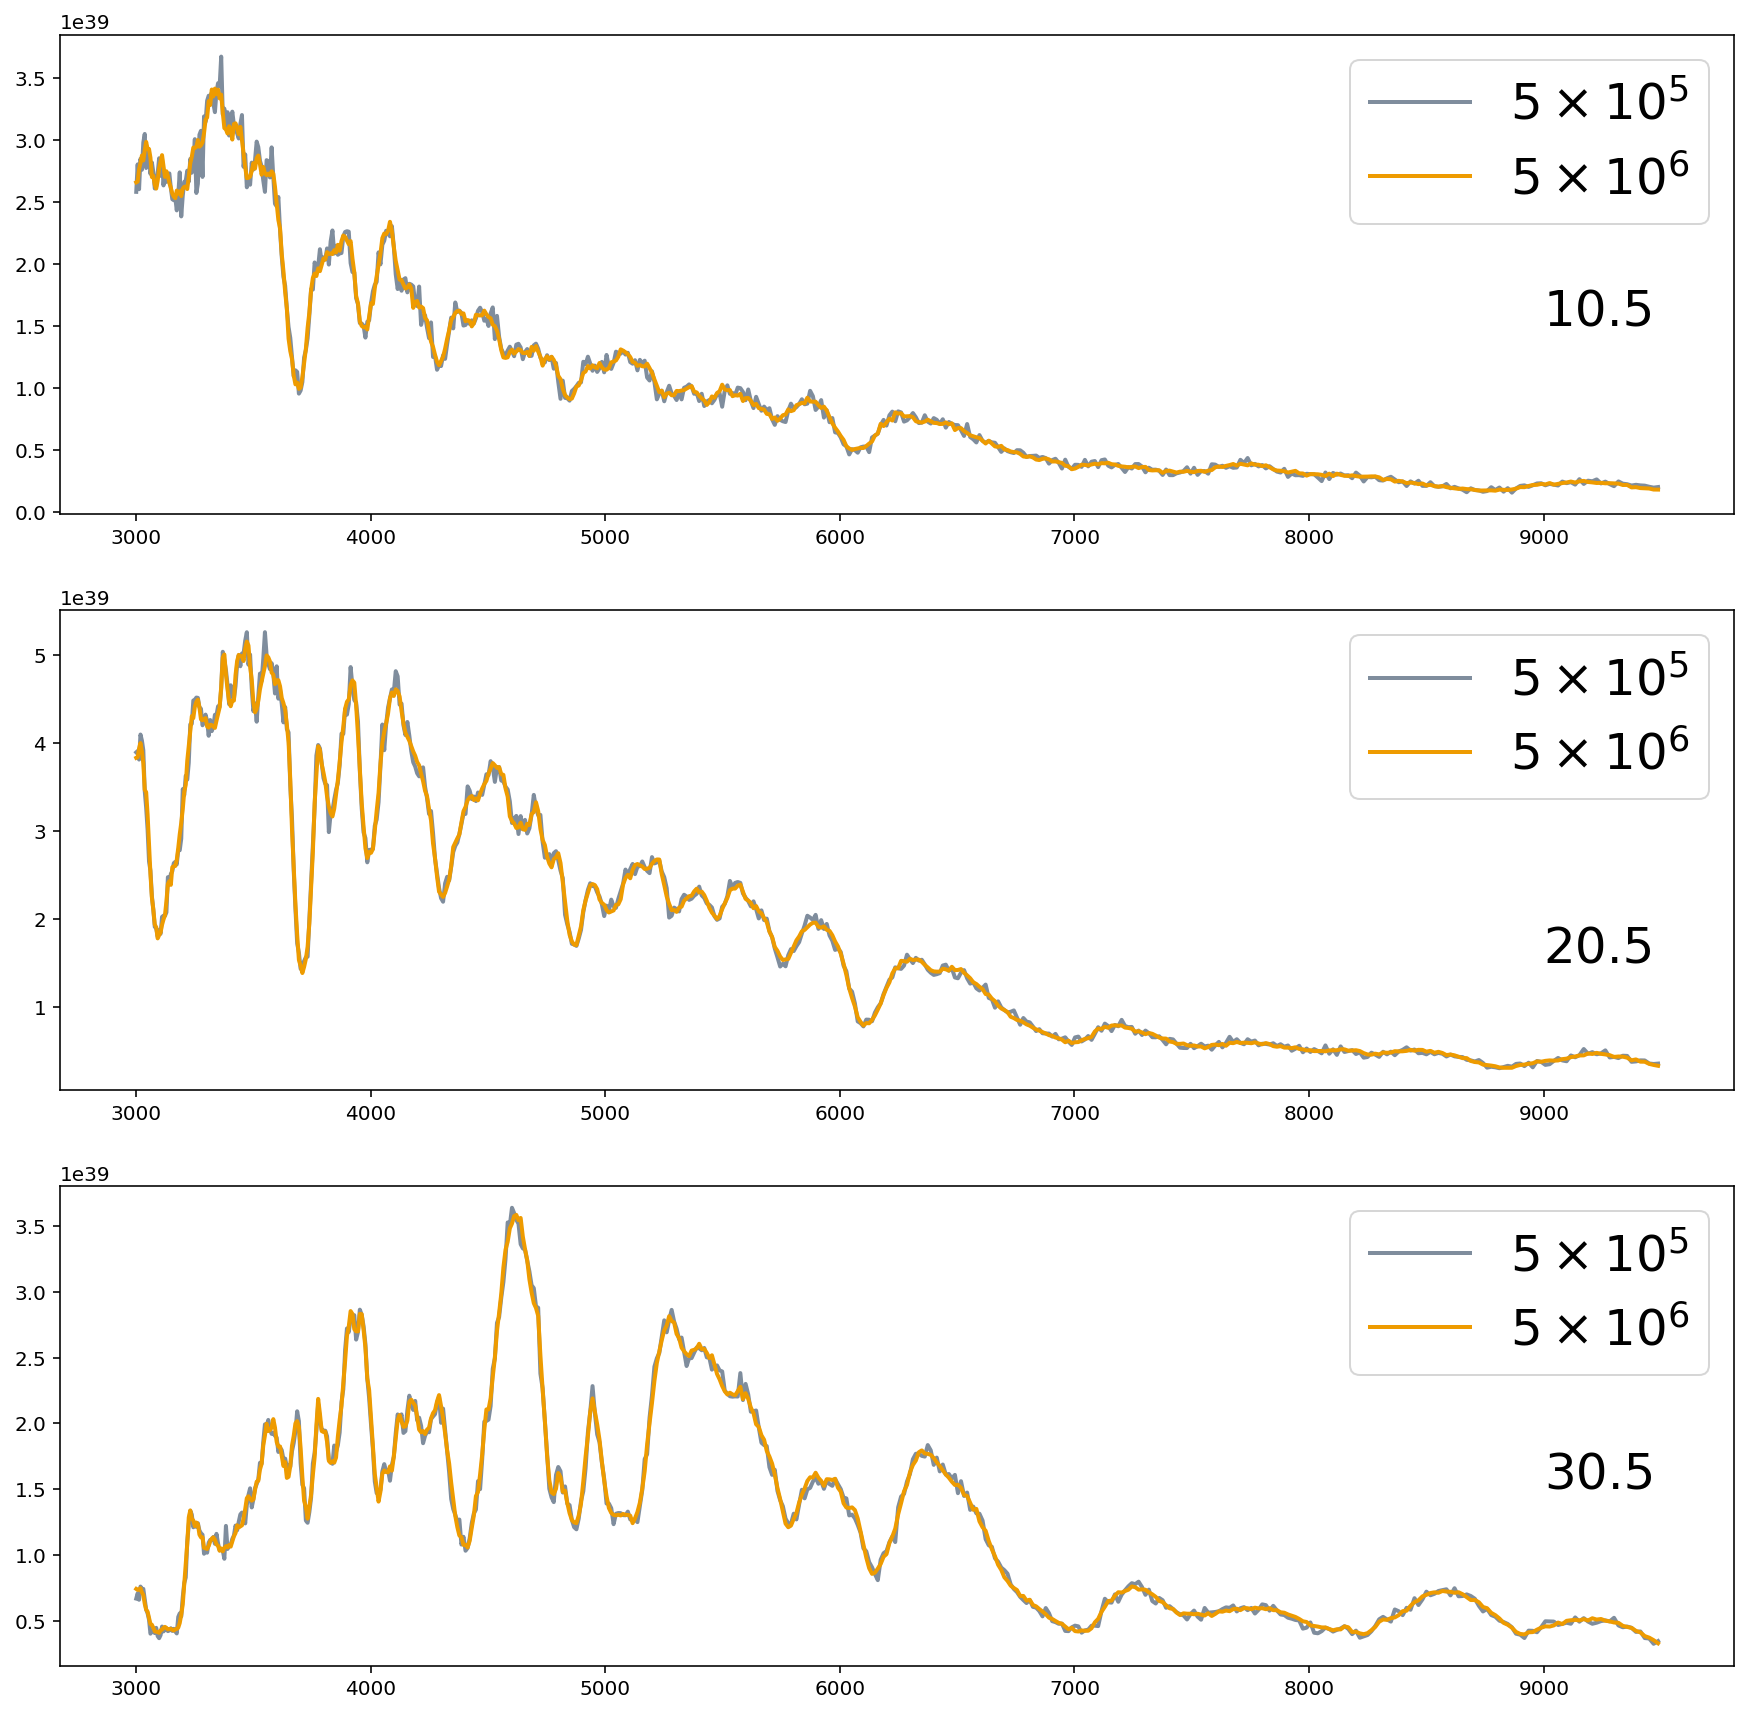

In [88]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

plot_sedona_spectrum(list_model1_spectra[4], axs[0], color='#001d3d', alpha=0.5, label=r'$5 \times 10^{5}$')
plot_sedona_spectrum(list_model2_spectra[4], axs[0], color='#ee9b00', alpha=1.0, label=r'$5 \times 10^{6}$')

axs[0].text(9000, 1.5e39, list_model1_spectra[4].split('/')[-1].split('_')[-1][0:4], fontsize=25)

plot_sedona_spectrum(list_model1_spectra[14], axs[1], color='#001d3d', alpha=0.5, label=r'$5 \times 10^{5}$')
plot_sedona_spectrum(list_model2_spectra[14], axs[1], color='#ee9b00', alpha=1.0, label=r'$5 \times 10^{6}$')

axs[1].text(9000, 1.5e39, list_model1_spectra[14].split('/')[-1].split('_')[-1][0:4], fontsize=25)

plot_sedona_spectrum(list_model1_spectra[24], axs[2], color='#001d3d', alpha=0.5, label=r'$5 \times 10^{5}$')
plot_sedona_spectrum(list_model2_spectra[24], axs[2], color='#ee9b00', alpha=1.0, label=r'$5 \times 10^{6}$')

axs[2].text(9000, 1.5e39, list_model1_spectra[24].split('/')[-1].split('_')[-1][0:4], fontsize=25)

'/Users/anirbandutta/Documents/SNEXP/Sedona_Run_Models/Model2_Sedona_106_20.5.csv'